# 从零开始构建三层神经网络分类器——实验报告

袁鹏宇 23210980120

### Section 0 模型链接
Code in Github repo: https://github.com/YepyYuan/DATA620004

Model pkl files in BaiduNetDisk: 链接：https://pan.baidu.com/s/1DF1KIL-cdYjn7dYzqJmK7g?pwd=mynn Password：mynn

### Section 1 数据集

本次实验在 Fashion-MNIST (https://github.com/zalandoresearch/fashion-mnist) 数据集上进行训练和测试。该数据集包括图像和标签两种类型数据，其中图像数据是分辨率为28*28的灰度值矩阵，灰度值取值为[0,255]的整数；标签数据为取值0-9之间的整数，代表10类不同的分类标签。该数据集提供了60000组训练数据用于训练模型，以及10000组数据用于测试模型分类准确率。本次实验中，以5：1的比例将训练数据划分为训练集和验证集两部分，验证集用于观察模型的过拟合程度，并以验证集的分类准确率为指标，挑选Best Model用于测试。

### Section 2 模型
本次实验采用多层全连接神经网络作为分类模型，隐藏层的激活函数使用线性整流函数(Rectified Linear Unit, ReLU), 输出层的激活函数使用Softmax以得到每一类别的分类概率。模型训练部分将以优化输出值与标签值的交叉熵(Cross Entrophy) 损失为目标，并加上 $L_2$ 正则项约束模型过拟合程度，通过梯度反向传播(Backward Propagation) 技术得到每一个参数的梯度，再通过随机梯度下降(Stochastic Gradient Descent, SGD) 算法更新参数。

### Section 3 代码介绍

本次实验代码不借助`Pytorch`, `Tensorflow`等成熟的神经网络计算框架，从零开始搭建多层全连接神经网络。`mynn/base.py`中定义了`Tensor`, `Layer`, `Optimizer`, `Sequential` 四个基类，`mynn/layer.py`定义了线性层、激活函数和交叉熵损失以及正向传播和反向传播等方法，`mynn/optimize.py`实现了SGD方法用于模型优化。`Dataloader.py`用于加载数据集，`train.py` 用于训练和保存模型模型，`para_search.py`用于参数搜索得到不同参数的结果，`test.py`用于加载模型和测试模型在测试集的准确率。

### Section 4 数值实验
本节将展示一次模型训练，对训练过程中训练集与验证集的损失曲线以及验证集的准确率曲线进行可视化，并对Best Model的网络参数进行可视化。

加载数据集和设置超参数

In [2]:
from Dataloader import load_mnist
from train import train, load_hyper_para
import numpy as np

path = './data'
image, label = load_mnist(path, kind= 'train')
image= image.copy().astype(np.float64)
# data normalization
image /= 255

## hyper parameters
hidden_layer = [512, 256]
lr = 0.01
decay = 0.05
batch_size = 64
num_epochs = 10

`load_hyper_para` 函数返回超参数对应的模型、损失函数和优化器

In [3]:
model, loss_fun, optimizer, para_dic = load_hyper_para(hidden_layer, lr, decay)

`train` 函数用于训练和保存模型，并返回存放训练集和验证集的损失和准确率的列表。以最高的验证集准确率为指标保存最优模型。

In [4]:
train_loss, train_acc, val_loss, val_acc = train(model, image, label, loss_fun, optimizer, para_dic=para_dic, num_epochs=num_epochs, batch_size=batch_size, iter_valid=50)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 01/10 Itr: 0001/0782 || training loss: 14.60702417 , training accuracy :0.0938  validation loss: 14.44020199 , validation accuracy :0.1041 
Epoch: 01/10 Itr: 0051/0782 || training loss: 6.51513323 , training accuracy :0.5938  validation loss: 5.59870426 , validation accuracy :0.6368 
Epoch: 01/10 Itr: 0101/0782 || training loss: 5.59826226 , training accuracy :0.6406  validation loss: 4.63890705 , validation accuracy :0.6736 
Epoch: 01/10 Itr: 0151/0782 || training loss: 5.44651040 , training accuracy :0.5312  validation loss: 4.06981235 , validation accuracy :0.6677 
Epoch: 01/10 Itr: 0201/0782 || training loss: 3.51016086 , training accuracy :0.6250  validation loss: 3.24082196 , validation accuracy :0.6593 
Epoch: 01/10 Itr: 0251/0782 || training loss: 3.56030181 , training accuracy :0.5625  validation loss: 2.77573248 , validation accuracy :0.6483 
Epoch: 01/10 Itr: 0301/0782 || training loss: 4.11071657 , training accuracy :0.5469  validation loss: 2.45817078 , validation a

 10%|█         | 1/10 [00:08<01:15,  8.44s/it]

Epoch: 02/10 Itr: 0001/0782 || training loss: 0.94378459 , training accuracy :0.6719  validation loss: 1.44398009 , validation accuracy :0.6471 
Epoch: 02/10 Itr: 0051/0782 || training loss: 1.26560361 , training accuracy :0.6719  validation loss: 1.33610056 , validation accuracy :0.6622 
Epoch: 02/10 Itr: 0101/0782 || training loss: 0.78811087 , training accuracy :0.7031  validation loss: 1.29281608 , validation accuracy :0.6633 
Epoch: 02/10 Itr: 0151/0782 || training loss: 1.57393692 , training accuracy :0.5000  validation loss: 1.22286552 , validation accuracy :0.6790 
Epoch: 02/10 Itr: 0201/0782 || training loss: 1.01844187 , training accuracy :0.6406  validation loss: 1.18510885 , validation accuracy :0.6796 
Epoch: 02/10 Itr: 0251/0782 || training loss: 1.34111042 , training accuracy :0.6250  validation loss: 1.13421835 , validation accuracy :0.6878 
Epoch: 02/10 Itr: 0301/0782 || training loss: 0.81082207 , training accuracy :0.7031  validation loss: 1.10770550 , validation acc

 20%|██        | 2/10 [00:17<01:09,  8.73s/it]

Epoch: 03/10 Itr: 0001/0782 || training loss: 0.72575995 , training accuracy :0.7500  validation loss: 0.85281870 , validation accuracy :0.7047 
Epoch: 03/10 Itr: 0051/0782 || training loss: 0.91125100 , training accuracy :0.6875  validation loss: 0.81189321 , validation accuracy :0.7360 
Epoch: 03/10 Itr: 0101/0782 || training loss: 0.58990273 , training accuracy :0.7188  validation loss: 0.79627254 , validation accuracy :0.7354 
Epoch: 03/10 Itr: 0151/0782 || training loss: 0.96493620 , training accuracy :0.6562  validation loss: 0.78980474 , validation accuracy :0.7421 
Epoch: 03/10 Itr: 0201/0782 || training loss: 0.52525575 , training accuracy :0.8125  validation loss: 0.77338568 , validation accuracy :0.7452 
Epoch: 03/10 Itr: 0251/0782 || training loss: 0.91739981 , training accuracy :0.7031  validation loss: 0.75830727 , validation accuracy :0.7466 
Epoch: 03/10 Itr: 0301/0782 || training loss: 0.65710687 , training accuracy :0.8125  validation loss: 0.73908862 , validation acc

 30%|███       | 3/10 [00:26<01:03,  9.04s/it]

Epoch: 04/10 Itr: 0001/0782 || training loss: 0.62745850 , training accuracy :0.7812  validation loss: 0.65272976 , validation accuracy :0.7691 
Epoch: 04/10 Itr: 0051/0782 || training loss: 0.74301124 , training accuracy :0.7344  validation loss: 0.63633274 , validation accuracy :0.7686 
Epoch: 04/10 Itr: 0101/0782 || training loss: 0.51605388 , training accuracy :0.8125  validation loss: 0.63241345 , validation accuracy :0.7709 
Epoch: 04/10 Itr: 0151/0782 || training loss: 0.79997274 , training accuracy :0.6562  validation loss: 0.62916247 , validation accuracy :0.7749 
Epoch: 04/10 Itr: 0201/0782 || training loss: 0.42056484 , training accuracy :0.8281  validation loss: 0.62571042 , validation accuracy :0.7788 
Epoch: 04/10 Itr: 0251/0782 || training loss: 0.70513156 , training accuracy :0.7656  validation loss: 0.61645119 , validation accuracy :0.7811 
Epoch: 04/10 Itr: 0301/0782 || training loss: 0.64657027 , training accuracy :0.7656  validation loss: 0.61122428 , validation acc

 40%|████      | 4/10 [00:36<00:54,  9.12s/it]

Epoch: 05/10 Itr: 0001/0782 || training loss: 0.56791445 , training accuracy :0.7812  validation loss: 0.58899015 , validation accuracy :0.7916 
Epoch: 05/10 Itr: 0051/0782 || training loss: 0.67676142 , training accuracy :0.7656  validation loss: 0.58182908 , validation accuracy :0.7926 
Epoch: 05/10 Itr: 0101/0782 || training loss: 0.53034444 , training accuracy :0.8125  validation loss: 0.58345192 , validation accuracy :0.7910 
Epoch: 05/10 Itr: 0151/0782 || training loss: 0.74882876 , training accuracy :0.7188  validation loss: 0.58151838 , validation accuracy :0.7952 
Epoch: 05/10 Itr: 0201/0782 || training loss: 0.40987950 , training accuracy :0.8906  validation loss: 0.58344557 , validation accuracy :0.7996 
Epoch: 05/10 Itr: 0251/0782 || training loss: 0.66665324 , training accuracy :0.7812  validation loss: 0.58079538 , validation accuracy :0.7960 
Epoch: 05/10 Itr: 0301/0782 || training loss: 0.64819786 , training accuracy :0.7656  validation loss: 0.57853521 , validation acc

 50%|█████     | 5/10 [00:45<00:45,  9.11s/it]

Epoch: 06/10 Itr: 0001/0782 || training loss: 0.52469597 , training accuracy :0.8750  validation loss: 0.58019520 , validation accuracy :0.8070 
Epoch: 06/10 Itr: 0051/0782 || training loss: 0.71130192 , training accuracy :0.7500  validation loss: 0.57687654 , validation accuracy :0.8067 
Epoch: 06/10 Itr: 0101/0782 || training loss: 0.59481974 , training accuracy :0.7812  validation loss: 0.57950006 , validation accuracy :0.8055 
Epoch: 06/10 Itr: 0151/0782 || training loss: 0.68215936 , training accuracy :0.7656  validation loss: 0.57921754 , validation accuracy :0.8082 
Epoch: 06/10 Itr: 0201/0782 || training loss: 0.41141416 , training accuracy :0.8906  validation loss: 0.58164509 , validation accuracy :0.8110 
Epoch: 06/10 Itr: 0251/0782 || training loss: 0.66648696 , training accuracy :0.7812  validation loss: 0.58137066 , validation accuracy :0.8094 
Epoch: 06/10 Itr: 0301/0782 || training loss: 0.66731280 , training accuracy :0.7656  validation loss: 0.58132155 , validation acc

 60%|██████    | 6/10 [00:53<00:35,  8.84s/it]

Epoch: 07/10 Itr: 0001/0782 || training loss: 0.53142431 , training accuracy :0.8750  validation loss: 0.60109166 , validation accuracy :0.8119 
Epoch: 07/10 Itr: 0051/0782 || training loss: 0.73455076 , training accuracy :0.7344  validation loss: 0.59898910 , validation accuracy :0.8150 
Epoch: 07/10 Itr: 0101/0782 || training loss: 0.63611113 , training accuracy :0.7812  validation loss: 0.60334487 , validation accuracy :0.8095 
Epoch: 07/10 Itr: 0151/0782 || training loss: 0.71327888 , training accuracy :0.7500  validation loss: 0.60366397 , validation accuracy :0.8120 
Epoch: 07/10 Itr: 0201/0782 || training loss: 0.45255674 , training accuracy :0.8594  validation loss: 0.60691949 , validation accuracy :0.8147 
Epoch: 07/10 Itr: 0251/0782 || training loss: 0.68116681 , training accuracy :0.7500  validation loss: 0.60812283 , validation accuracy :0.8132 
Epoch: 07/10 Itr: 0301/0782 || training loss: 0.71901929 , training accuracy :0.7656  validation loss: 0.60929681 , validation acc

 70%|███████   | 7/10 [01:01<00:25,  8.61s/it]

Epoch: 08/10 Itr: 0001/0782 || training loss: 0.55269755 , training accuracy :0.8594  validation loss: 0.63430147 , validation accuracy :0.8098 
Epoch: 08/10 Itr: 0051/0782 || training loss: 0.76077404 , training accuracy :0.7500  validation loss: 0.63180611 , validation accuracy :0.8107 
Epoch: 08/10 Itr: 0101/0782 || training loss: 0.68621564 , training accuracy :0.7656  validation loss: 0.63543119 , validation accuracy :0.8072 
Epoch: 08/10 Itr: 0151/0782 || training loss: 0.73651371 , training accuracy :0.7500  validation loss: 0.63568785 , validation accuracy :0.8103 
Epoch: 08/10 Itr: 0201/0782 || training loss: 0.49725416 , training accuracy :0.8594  validation loss: 0.63943341 , validation accuracy :0.8140 
Epoch: 08/10 Itr: 0251/0782 || training loss: 0.70825002 , training accuracy :0.7500  validation loss: 0.64085520 , validation accuracy :0.8098 
Epoch: 08/10 Itr: 0301/0782 || training loss: 0.75629595 , training accuracy :0.7656  validation loss: 0.64158850 , validation acc

 80%|████████  | 8/10 [01:10<00:17,  8.76s/it]

Epoch: 09/10 Itr: 0001/0782 || training loss: 0.60142054 , training accuracy :0.8594  validation loss: 0.66638884 , validation accuracy :0.8052 
Epoch: 09/10 Itr: 0051/0782 || training loss: 0.78404407 , training accuracy :0.7500  validation loss: 0.66434358 , validation accuracy :0.8057 
Epoch: 09/10 Itr: 0101/0782 || training loss: 0.72437815 , training accuracy :0.7656  validation loss: 0.66688320 , validation accuracy :0.8010 
Epoch: 09/10 Itr: 0151/0782 || training loss: 0.76864319 , training accuracy :0.7500  validation loss: 0.66685092 , validation accuracy :0.8051 
Epoch: 09/10 Itr: 0201/0782 || training loss: 0.53433050 , training accuracy :0.8281  validation loss: 0.67008341 , validation accuracy :0.8087 
Epoch: 09/10 Itr: 0251/0782 || training loss: 0.74431524 , training accuracy :0.7656  validation loss: 0.67104470 , validation accuracy :0.8054 
Epoch: 09/10 Itr: 0301/0782 || training loss: 0.78492937 , training accuracy :0.7500  validation loss: 0.67121731 , validation acc

 90%|█████████ | 9/10 [01:18<00:08,  8.62s/it]

Epoch: 10/10 Itr: 0001/0782 || training loss: 0.64521565 , training accuracy :0.8750  validation loss: 0.69112832 , validation accuracy :0.7979 
Epoch: 10/10 Itr: 0051/0782 || training loss: 0.80296914 , training accuracy :0.7188  validation loss: 0.68865119 , validation accuracy :0.8002 
Epoch: 10/10 Itr: 0101/0782 || training loss: 0.74965851 , training accuracy :0.7656  validation loss: 0.69034769 , validation accuracy :0.7956 
Epoch: 10/10 Itr: 0151/0782 || training loss: 0.79485199 , training accuracy :0.7500  validation loss: 0.68995119 , validation accuracy :0.7976 
Epoch: 10/10 Itr: 0201/0782 || training loss: 0.55660092 , training accuracy :0.8281  validation loss: 0.69246416 , validation accuracy :0.7993 
Epoch: 10/10 Itr: 0251/0782 || training loss: 0.76991989 , training accuracy :0.7812  validation loss: 0.69300899 , validation accuracy :0.7969 
Epoch: 10/10 Itr: 0301/0782 || training loss: 0.80307193 , training accuracy :0.7188  validation loss: 0.69258984 , validation acc

100%|██████████| 10/10 [01:26<00:00,  8.69s/it]

Training Complete!
Best Model at (epoch: 07, iteration: 0451)


可视化损失与准确率的曲线

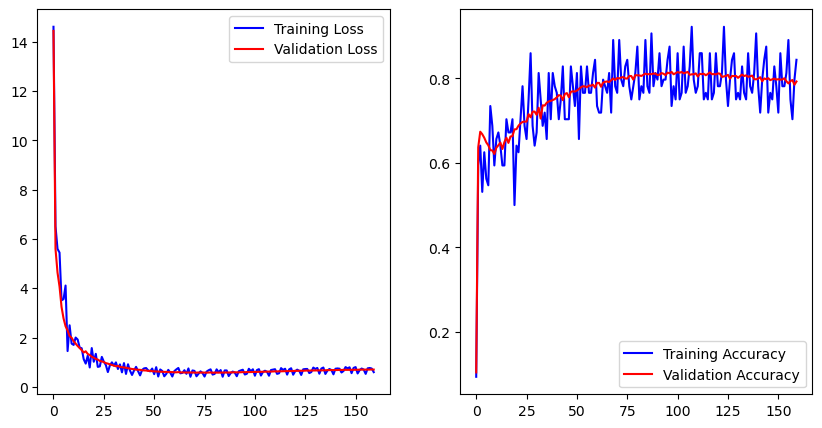

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= [10,5])

fig.add_subplot(121)
plt.plot(train_loss, color = 'b')
plt.plot(val_loss, color = 'r')
plt.legend(['Training Loss', 'Validation Loss'])

fig.add_subplot(122)
plt.plot(train_acc, color = 'b')
plt.plot(val_acc, color = 'r')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

加载模型并在测试集上测试准确率，该功能在`test.py` 中实现。

In [6]:
import pickle


image , label = load_mnist(path, kind= 't10k')
image= image.copy().astype(np.float64)

# Data Normalization
image /= 255

# load model
with open('./model/best_model.pkl', 'rb') as file:
    model_test = pickle.load(file)

pred = model_test(image).argmax(axis = 1)

test_accuracy = (pred == label).mean()

print('Accuracy: {:.3f}'.format(test_accuracy))

Accuracy: 0.807


模型网络参数可视化

In [7]:
parameters = model_test.parameters()

w1, b1 = parameters[0].data, parameters[1].data
w2, b2 = parameters[2].data, parameters[3].data
w3, b3 = parameters[4].data, parameters[5].data

(-0.5, 255.5, 9.5, -0.5)

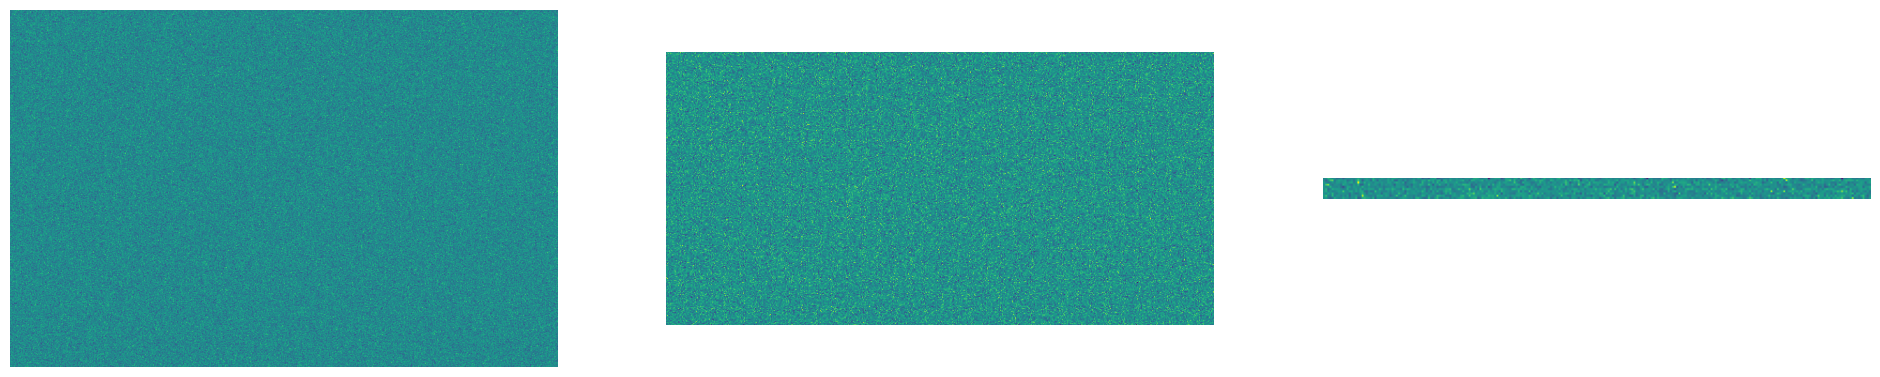

In [32]:
fig_weight = plt.figure(figsize=[24,8])

fig_weight.add_subplot(131)
plt.imshow(w1.T)
plt.axis('off')

fig_weight.add_subplot(132)
plt.imshow(w2.T)
plt.axis('off')

fig_weight.add_subplot(133)
plt.imshow(w3.T)
plt.axis('off')

(-0.5, 9.5, 0.5, -0.5)

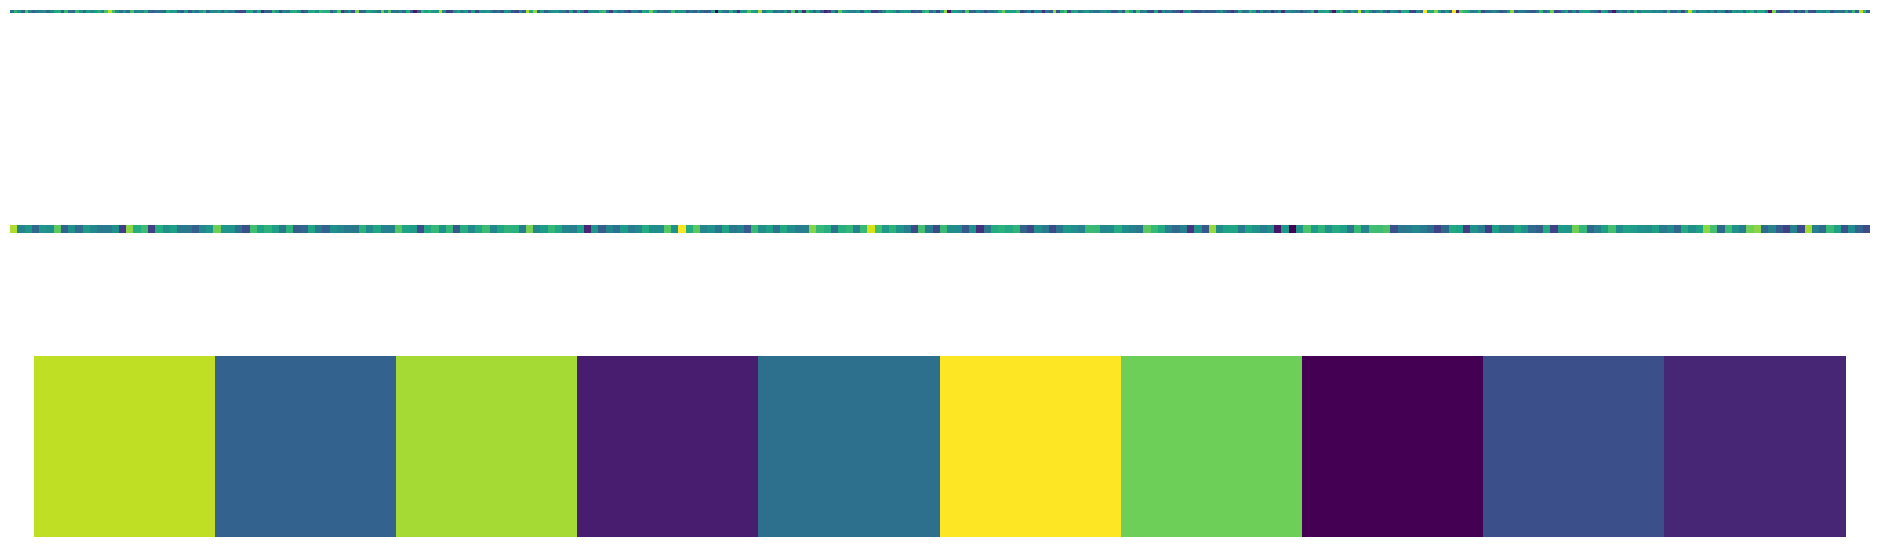

In [15]:
fig_bias = plt.figure(figsize=[24,8])

fig_bias.add_subplot(311)
plt.imshow(b1)
plt.axis('off')

fig_bias.add_subplot(312)
plt.imshow(b2)
plt.axis('off')

fig_bias.add_subplot(313)
plt.imshow(b3)
plt.axis('off')

`para_search.py` 实现了参数查找功能，本次实验查找了隐藏层大小、学习率和正则化强度三个超参数，具体训练过程在报告中省略，仅展示模型的结果，模型权重文件可以在Section 0 中的百度网盘链接中下载。

此处展示了隐藏层大小和学习率固定，测试准确率与正则化强度的散点图，整体来看，适当的正则化可以提高模型的准确性。

纵向的图片是固定学习率不变，隐藏层变大；横向的图片是网络不变，学习率变小。

In [21]:
def test(data_path, model_path, load_kind = 't10k'):

    image , label = load_mnist(data_path, kind= load_kind)
    image= image.copy().astype(np.float64)

    ## Data Normalization
    image /= 255

    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    pred = model(image).argmax(axis = 1)

    test_accuracy = (pred == label).mean()

    return test_accuracy

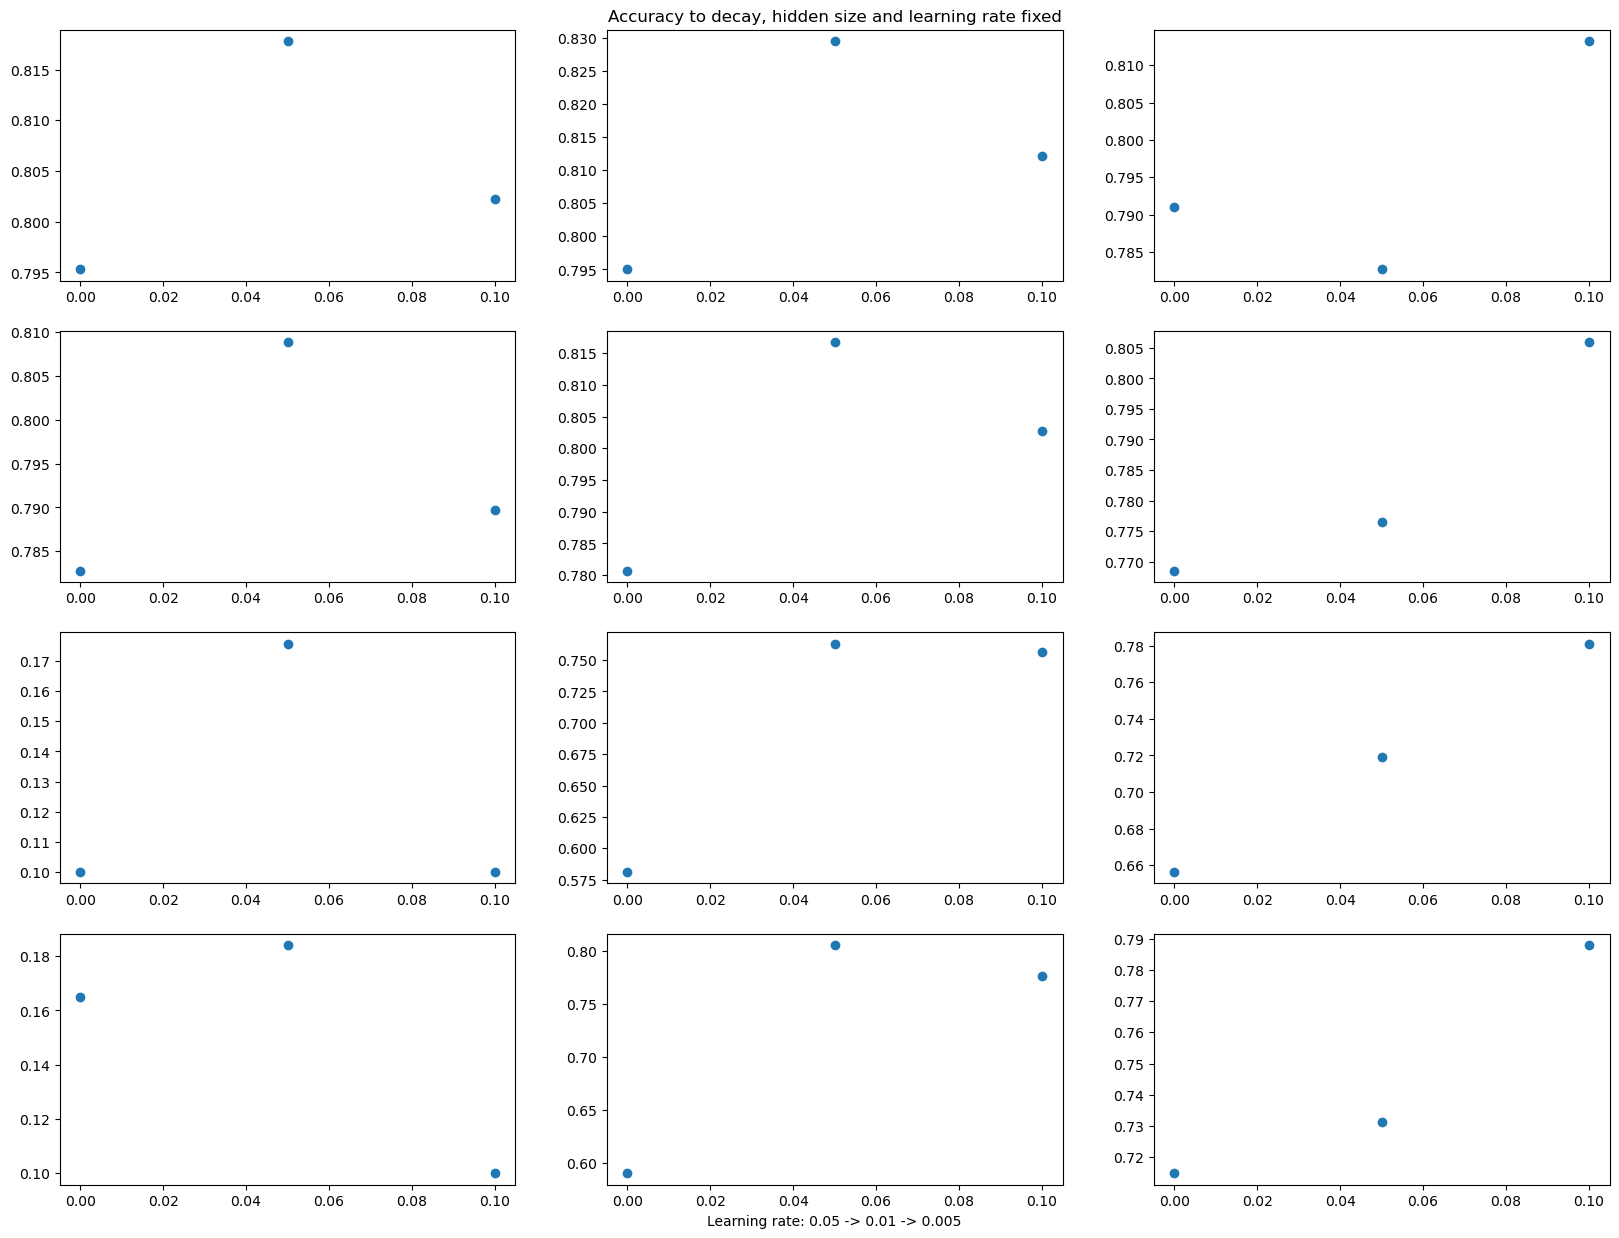

In [31]:
import os

model_file_folder_list = os.listdir('D:/Github_repo/model')

fig_decay = plt.figure(figsize=[20,15])
plt.title('Accuracy to decay, hidden size and learning rate fixed')
plt.axis('off')

for k in range(12):
    folder = model_file_folder_list[3*k:3*k+3]
    acc_list = []
    for l in range(3):
        model_path = 'D:/Github_repo/model/' + folder[l] + '/best_model.pkl'
        acc_list.append(test(data_path='./data', model_path=model_path))
    
    decay_list = [0, 0.05, 0.1]
    fig_decay.add_subplot(4,3,k+1)
    plt.scatter(decay_list, acc_list)
    if k == 10:
        plt.xlabel('Learning rate: 0.05 -> 0.01 -> 0.005')
